C1
<br>
Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps: 
a. Import the necessary packages
b. Load the training and testing data 
c. Define the network architecture using Keras 
d. Train the model using SGD with 11 epochs
e. Evaluate the network  
f. Plot the training loss and accuracy


In [285]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [286]:
((xtr, ytr), (xte, yte)) = tf.keras.datasets.mnist.load_data()

In [287]:
xtr = xtr.reshape(xtr.shape[0],28*28*1)
xte = xte.reshape(xte.shape[0],28*28*1)
xtr = xtr.astype("float32")/255.0
xte = xte.astype('float32')/255.0

In [288]:
lb = LabelBinarizer()
ytr = lb.fit_transform(ytr)
yte = lb.transform(yte)

In [289]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(102, input_shape=(784,), activation = "relu"))
model.add(tf.keras.layers.Dense(64, activation="sigmoid"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 102)               80070     
                                                                 
 dense_105 (Dense)           (None, 64)                6592      
                                                                 
 dense_106 (Dense)           (None, 10)                650       
                                                                 
Total params: 87,312
Trainable params: 87,312
Non-trainable params: 0
_________________________________________________________________


In [290]:
sgd = tf.keras.optimizers.SGD(0.01)
model.compile(optimizer=sgd, loss="categorical_crossentropy",metrics=['accuracy'])

In [291]:
h = model.fit(xtr,ytr, validation_data=(xte,yte), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4315 - accuracy: 0.6791 - val_loss: 0.7622 - val_accuracy: 0.8336
Epoch 2/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5899 - accuracy: 0.8651 - val_loss: 0.4589 - val_accuracy: 0.8894
Epoch 3/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4214 - accuracy: 0.8917 - val_loss: 0.3694 - val_accuracy: 0.9013
Epoch 4/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3577 - accuracy: 0.9035 - val_loss: 0.3274 - val_accuracy: 0.9086
Epoch 5/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3229 - accuracy: 0.9096 - val_loss: 0.3023 - val_accuracy: 0.9157
Epoch 6/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2997 - accuracy: 0.9149 - val_loss: 0.2836 - val_accuracy: 0.9208
Epoch 7/11
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2820 - accuracy: 0.9190 - val_loss: 0.2704 - val_accuracy:

In [292]:
pred = model.predict(xte, batch_size=128)
print(classification_report(pred.argmax(axis=1), yte.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1008
           1       0.98      0.98      0.98      1135
           2       0.91      0.94      0.92      1003
           3       0.91      0.93      0.92       994
           4       0.95      0.93      0.94      1005
           5       0.90      0.92      0.91       870
           6       0.96      0.94      0.95       976
           7       0.93      0.95      0.94      1011
           8       0.92      0.90      0.91       994
           9       0.92      0.92      0.92      1004

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



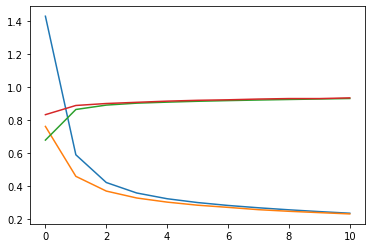

In [293]:
plt.plot(np.arange(0, 11),h.history['loss'])
plt.plot(np.arange(0, 11),h.history['val_loss'])
plt.plot(np.arange(0, 11),h.history['accuracy'])
plt.plot(np.arange(0, 11),h.history['val_accuracy'])

In [294]:
loss, acc = model.evaluate(xte,yte)

313/313 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9355


C2
<br>
Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:
a.	Loading and preprocessing the image data
b.	Defining the model's architecture
c.	Training the model
d.	Estimating the model's performance


In [295]:
((xtr,ytr),(xte,yte)) = tf.keras.datasets.mnist.load_data()

In [296]:
xtr = xtr/255.0
xte = xte/255.0
xtr = np.expand_dims(xtr, -1)
xte = np.expand_dims(xte, -1)
ytr = tf.keras.utils.to_categorical(ytr, 10)
yte = tf.keras.utils.to_categorical(yte, 10)
print("x_train shape:", xtr.shape)
print(xtr.shape[0], "train samples")
print(xte.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


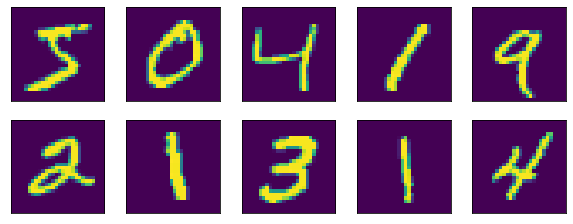

In [297]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtr[i])
    #plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [298]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_101 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_107 (Dense)           (None, 128)               692352    
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_108 (Dense)           (None, 10)                1290      
                                                     

In [301]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [302]:
h = model.fit(xtr,ytr, validation_data=(xte, yte), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 30s 62ms/step - loss: 0.2488 - accuracy: 0.9291 - val_loss: 0.0935 - val_accuracy: 0.9728
Epoch 2/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0810 - accuracy: 0.9764 - val_loss: 0.0526 - val_accuracy: 0.9809
Epoch 3/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0531 - val_accuracy: 0.9822
Epoch 4/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0428 - accuracy: 0.9871 - val_loss: 0.0453 - val_accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0427 - val_accuracy: 0.9848
Epoch 6/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0402 - val_accuracy: 0.9867
Epoch 7/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0358 - val_accuracy:

In [304]:
print(classification_report(pred.argmax(axis=1), yte.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1008
           1       0.98      0.98      0.98      1135
           2       0.91      0.94      0.92      1003
           3       0.91      0.93      0.92       994
           4       0.95      0.93      0.94      1005
           5       0.90      0.92      0.91       870
           6       0.96      0.94      0.95       976
           7       0.93      0.95      0.94      1011
           8       0.92      0.90      0.91       994
           9       0.92      0.92      0.92      1004

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



In [305]:
loss,accuracy = model.evaluate(xte,yte)

313/313 [==============================] - 2s 7ms/step - loss: 0.0400 - accuracy: 0.9873


Predicted value is:  0


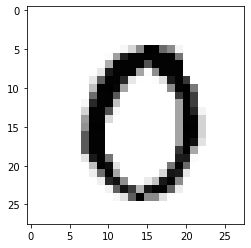

In [309]:
plt.imshow(xte[13].reshape(28, 28),cmap='Greys')
pred = model.predict(xte[13].reshape(1, 28, 28, 1))
print("Predicted value is: ", pred.argmax())

C3
<br>
Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
a.	Import the necessary packages
b.	Load the training and testing data 
c.	Define the network architecture using Keras 
d.	Train the model using SGD/Adam optimizer
e.	Evaluate the network  
f.	Plot the training loss and accuracy


In [49]:
((xtr,ytr), (xte,yte)) = tf.keras.datasets.cifar10.load_data()

In [68]:
((X_train, Y_train), (X_test, Y_test)) = tf.keras.datasets.cifar10.load_data()
X_train = X_train.reshape((X_train.shape[0], 32 * 32 * 3))
X_test = X_test.reshape((X_test.shape[0], 32 * 32 * 3))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [76]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [80]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(3072,), activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 128)               393344    
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 5s 10ms/step - loss: 1.9803 - accuracy: 0.2948 - val_loss: 1.8550 - val_accuracy: 0.3394
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 1.7836 - accuracy: 0.3641 - val_loss: 1.7236 - val_accuracy: 0.3899
Epoch 3/10
391/391 [==============================] - 4s 9ms/step - loss: 1.6994 - accuracy: 0.3937 - val_loss: 1.6653 - val_accuracy: 0.4031
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 1.6461 - accuracy: 0.4158 - val_loss: 1.6245 - val_accuracy: 0.4270
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 1.5955 - accuracy: 0.4313 - val_loss: 1.5933 - val_accuracy: 0.4306
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 1.5653 - accuracy: 0.4433 - val_loss: 1.5555 - val_accuracy: 0.4450
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 1.5336 - accuracy: 0.4551 - val_loss: 1.5529 - val_accuracy: 0.4485


In [84]:
preds = model.predict(X_test)
print(classification_report(preds.argmax(axis=1), Y_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.63      0.42      0.51      1480
           1       0.58      0.56      0.57      1033
           2       0.31      0.34      0.32       929
           3       0.37      0.32      0.34      1180
           4       0.26      0.51      0.35       517
           5       0.24      0.42      0.30       565
           6       0.66      0.43      0.52      1534
           7       0.48      0.54      0.51       881
           8       0.63      0.55      0.59      1151
           9       0.43      0.59      0.50       730

    accuracy                           0.46     10000
   macro avg       0.46      0.47      0.45     10000
weighted avg       0.50      0.46      0.47     10000



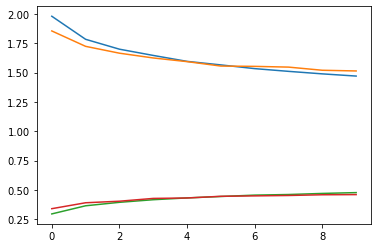

In [88]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

C4
<br>
       Implement the CNN model for classifying CIFAR10 image dataset by dividing the    
      model into following 4 stages:
a.	Loading and preprocessing the image data
b.	Defining the model's architecture
c.	Training the model
d.	Estimating the model's performance


In [13]:
((xtr, ytr),(xte,yte)) = tf.keras.datasets.cifar10.load_data()

In [14]:
xtr = xtr/255.0
xte = xte/255.0

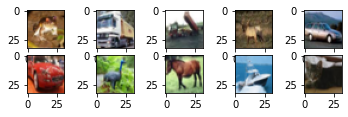

In [15]:
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(xtr[i])

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), input_shape = (32,32,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [20]:
sgd = tf.keras.optimizers.SGD(0.01)
model.compile(optimizer=sgd, loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [21]:
h = model.fit(xtr, ytr, validation_data=(xte,yte), epochs= 10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 30s 75ms/step - loss: 2.2658 - accuracy: 0.1589 - val_loss: 2.1839 - val_accuracy: 0.1720
Epoch 2/10
391/391 [==============================] - 29s 75ms/step - loss: 2.0610 - accuracy: 0.2419 - val_loss: 1.9623 - val_accuracy: 0.2890
Epoch 3/10
391/391 [==============================] - 31s 80ms/step - loss: 1.9023 - accuracy: 0.3156 - val_loss: 1.8144 - val_accuracy: 0.3559
Epoch 4/10
391/391 [==============================] - 31s 80ms/step - loss: 1.7868 - accuracy: 0.3625 - val_loss: 1.7101 - val_accuracy: 0.3869
Epoch 5/10
391/391 [==============================] - 32s 82ms/step - loss: 1.6818 - accuracy: 0.3995 - val_loss: 1.6092 - val_accuracy: 0.4170
Epoch 6/10
391/391 [==============================] - 32s 82ms/step - loss: 1.6043 - accuracy: 0.4241 - val_loss: 1.6127 - val_accuracy: 0.4157
Epoch 7/10
391/391 [==============================] - 32s 83ms/step - loss: 1.5525 - accuracy: 0.4440 - val_loss: 1.5694 - val_accuracy:

In [26]:
pred = model.predict(xte, batch_size=128)
print(classification_report(pred.argmax(axis=1), yte.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10       535
           1       0.00      0.00      0.00       782
           2       0.00      0.00      0.00       502
           3       0.00      0.00      0.00      1099
           4       0.00      0.00      0.00      1057
           5       0.00      0.00      0.00      1573
           6       0.00      0.00      0.00       917
           7       0.00      0.00      0.00       888
           8       0.00      0.00      0.00      1012
           9       0.00      0.00      0.00      1635

    accuracy                           0.05     10000
   macro avg       0.01      0.10      0.01     10000
weighted avg       0.00      0.05      0.01     10000



C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C5
<br>
Implement anomaly detection for given credit card dataset using Autoencoder and build the model by using the following steps:
a.	Import required libraries
b.	Upload / access the dataset
c.	Encoder converts it into latent representation
d.	Decoder networks convert it back to the original input
e.	Compile the models with Optimizer, Loss, and Evaluation Metrics

In [168]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [156]:
data.Class.unique()

array([0, 1], dtype=int64)

In [157]:
sc = StandardScaler()
data['Time'] = sc.fit_transform(data['Time'].values.reshape(-1,1))
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1, 1))

In [158]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [159]:
df = data.values
labels = df[:,-1]
values = df[:,0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(values,labels, test_size=0.2, random_state=123)

In [160]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data-min_val)/(max_val-min_val)
test_data = (test_data-min_val)/(max_val-min_val)

train_data = tf.cast(train_data, "float32")
test_data = tf.cast(test_data, "float32")

In [161]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [166]:
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]

In [162]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Dropout

In [174]:
class AutoEncoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([
            Dense(64,activation='relu'),
            Dropout(0.1),
            Dense(32,activation='relu'),
            Dropout(0.1),
            Dense(16,activation='relu'),
            Dropout(0.1),
            Dense(ldim,activation='relu')
            
        ])
        self.decoder = Sequential([
            Dense(16,activation='relu'),
            Dropout(0.1),
            Dense(32,activation='relu'),
            Dropout(0.1),
            Dense(64,activation='relu'),
            Dropout(0.1),
            Dense(output_units,activation='sigmoid')
            
        ])
        
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [184]:
model = AutoEncoder(output_units=normal_train_data.shape[1])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [185]:
h = model.fit(normal_train_data,normal_train_data, validation_data=(normal_test_data,normal_test_data), epochs=10, batch_size=512)

Epoch 1/10
445/445 [==============================] - 6s 11ms/step - loss: 2.6071e-05 - accuracy: 0.0356 - val_loss: 1.8730e-05 - val_accuracy: 0.0281
Epoch 2/10
445/445 [==============================] - 4s 10ms/step - loss: 1.9300e-05 - accuracy: 0.0447 - val_loss: 1.8723e-05 - val_accuracy: 0.0413
Epoch 3/10
445/445 [==============================] - 5s 10ms/step - loss: 1.9176e-05 - accuracy: 0.0560 - val_loss: 1.8717e-05 - val_accuracy: 0.1245
Epoch 4/10
445/445 [==============================] - 4s 10ms/step - loss: 1.9167e-05 - accuracy: 0.0738 - val_loss: 1.8719e-05 - val_accuracy: 0.0348
Epoch 5/10
445/445 [==============================] - 4s 10ms/step - loss: 1.9168e-05 - accuracy: 0.0825 - val_loss: 1.8721e-05 - val_accuracy: 0.0348
Epoch 6/10
445/445 [==============================] - 4s 10ms/step - loss: 1.9169e-05 - accuracy: 0.0708 - val_loss: 1.8723e-05 - val_accuracy: 0.0281
Epoch 7/10
445/445 [==============================] - 4s 10ms/step - loss: 1.9170e-05 - accura

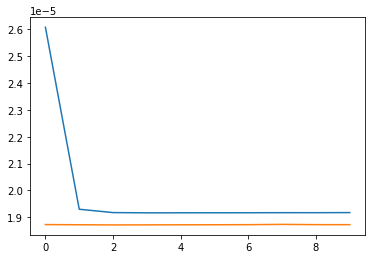

In [191]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [193]:
def find_threshold(model, normal_train_data):
    reconstructions = model.predict(normal_train_data)
    recons_error = tf.keras.losses.msle(reconstructions,normal_train_data)
    threshold = np.mean(recons_error.numpy()) / np.std(recons_error.numpy()) 
    return threshold

In [196]:
threshold = find_threshold(model,normal_train_data)
print(threshold)

0.19648612


In [195]:
def get_pred(model, normal_test_data, threshold):
    pred = model.predict(normal_test_data)
    errors = tf.keras.losses.msle(pred,normal_test_data)
    anomaly_mask = pd.Series(errors)>threshold
    preds = anomaly_mask.map(lambda x : 0.0 if x==True else 1.0)
    return preds

In [198]:
prediction = get_pred(model,normal_test_data,threshold)

C6
<br>
Implement the Continuous Bag of Words (CBOW) Model for the given (textual document 1) using the below steps:
a. Data preparation
b. Generate training data
c. Train model
d. Output


In [219]:
str_data = """ Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. 
Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance. """

In [221]:
dl_data = str_data.split()
dl_data

['Deep',
 'learning',
 '(also',
 'known',
 'as',
 'deep',
 'structured',
 'learning)',
 'is',
 'part',
 'of',
 'a',
 'broader',
 'family',
 'of',
 'machine',
 'learning',
 'methods',
 'based',
 'on',
 'artificial',
 'neural',
 'networks',
 'with',
 'representation',
 'learning.',
 'Learning',
 'can',
 'be',
 'supervised,',
 'semi-supervised',
 'or',
 'unsupervised.',
 'Deep-learning',
 'architectures',
 'such',
 'as',
 'deep',
 'neural',
 'networks,',
 'deep',
 'belief',
 'networks,',
 'deep',
 'reinforcement',
 'learning,',
 'recurrent',
 'neural',
 'networks,',
 'convolutional',
 'neural',
 'networks',
 'and',
 'Transformers',
 'have',
 'been',
 'applied',
 'to',
 'fields',
 'including',
 'computer',
 'vision,',
 'speech',
 'recognition,',
 'natural',
 'language',
 'processing,',
 'machine',
 'translation,',
 'bioinformatics,',
 'drug',
 'design,',
 'medical',
 'image',
 'analysis,',
 'climate',
 'science,',
 'material',
 'inspection',
 'and',
 'board',
 'game',
 'programs,',
 'where

In [226]:
from keras.preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

In [238]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(dl_data)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k,v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc) ] for doc in dl_data]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

In [239]:
def generate_context_word_pair(corpus, window_size, vocab_size):
    con_len = window_size*2 
    for words in corpus:
        sen_len = len(words)
        for index, word in enumerate(words):
            con_words = []
            label_words = []
            start = index-window_size
            end = index+window_size+1                
      
            con_words.append([words[i] for i in range(start,end) 
                                 if 0<=i<sen_len and i!=index])
                
            label_words.append(word)
                
            x = pad_sequences(con_words, maxlen=con_len)
            y = np_utils.to_categorical(label_words, vocab_size)
                
            yield(x,y)
                
                

In [240]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

print(cbow.summary())

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 100)            7500      
                                                                 
 lambda_2 (Lambda)           (None, 100)               0         
                                                                 
 dense_102 (Dense)           (None, 75)                7575      
                                                                 
Total params: 15,075
Trainable params: 15,075
Non-trainable params: 0
_________________________________________________________________
None


In [241]:
for epoch in range(1,6):
    loss = 0
    i=0
    for x,y in generate_context_word_pair(wids,window_size,vocab_size):
        i+=1
        loss += cbow.train_on_batch(x,y)
    print("Epoch: ", epoch, " Loss: ", loss)

Epoch:  1  Loss:  434.2002959251404
Epoch:  2  Loss:  429.30360198020935
Epoch:  3  Loss:  425.83318305015564
Epoch:  4  Loss:  422.4993612766266
Epoch:  5  Loss:  419.9417495727539


In [242]:
weights = cbow.get_weights()[0]
weights = weights[1:]
pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
deep,0.013531,-0.028044,-0.045342,0.019397,0.014413,0.025171,0.001748,-0.064660,0.026243,0.040329,...,0.014160,-0.006753,0.010543,-0.020767,-0.023071,0.029754,-0.020780,0.050423,-0.007583,-0.046324
networks,0.017099,0.028775,-0.058157,-0.011204,-0.017834,-0.018490,0.017334,-0.006986,-0.001970,-0.003644,...,0.032404,-0.064306,0.060235,0.032978,-0.040194,-0.011736,-0.019174,0.013842,-0.006475,-0.049541
neural,0.046440,0.029516,0.007483,0.024282,0.044099,-0.042670,0.017086,0.001828,-0.004482,0.019443,...,0.008376,-0.026354,0.004281,0.031375,0.011006,0.035972,-0.032672,0.007189,0.028699,0.024418
and,0.021864,0.022658,0.038223,-0.002278,-0.049382,-0.007925,0.043017,0.003763,-0.029793,0.036016,...,0.011963,0.048492,-0.020437,0.005808,-0.024774,-0.037281,0.048176,-0.012608,0.018695,0.017227
as,-0.010544,-0.030102,0.020239,0.027290,0.022750,0.049210,-0.032625,-0.000226,-0.004265,0.002153,...,0.000044,0.027168,0.013429,-0.020681,-0.000414,0.019372,-0.002826,0.017581,-0.017705,-0.047159


In [243]:
from sklearn.metrics.pairwise import euclidean_distances
dist_mat = euclidean_distances(weights)


In [249]:
sim_words = {search_term:[id2word[ind] for ind in dist_mat[word2id[search_term]-1].argsort()[1:6]+1]
            for search_term in ['deep']}

In [250]:
sim_words

{'deep': ['applied', 'learning', 'board', 'transformers', 'as']}

C9
<br>
Object detection using Transfer Learning of CNN architectures for the given (image dataset 1) using the below steps:
a. Load in a pre-trained CNN model trained on a large dataset
b. Freeze parameters (weights) in model's lower convolutional layers
c. Add custom classifier with several layers of trainable parameters to model
d. Train classifier layers on training data available for task
e. Fine-tune hyper parameters and unfreeze more layers as needed


In [257]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=(0.5,1),
                                                               channel_shift_range=0.2,
                                                               vertical_flip=True,
                                                               horizontal_flip=True, 
                                                               rescale=1./255,
                                                               validation_split=0.3)


In [258]:
root_dir = '101_ObjectCategories'
train_img = img_generator.flow_from_directory(directory=root_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True,
                                             class_mode='categorical',
                                             subset='training'
                                             )

val_img = img_generator.flow_from_directory(directory=root_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True,
                                             class_mode='categorical',
                                             subset='validation'
                                             )

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


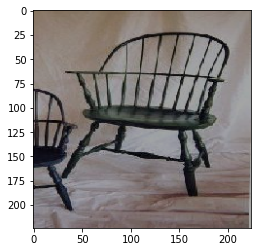

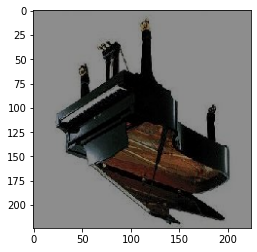

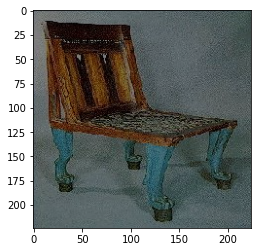

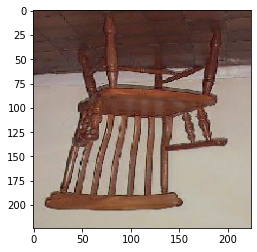

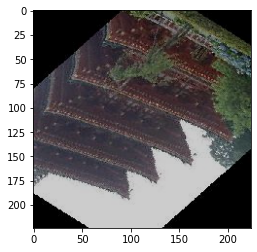

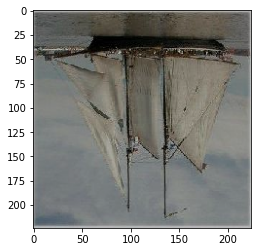

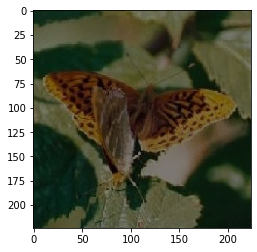

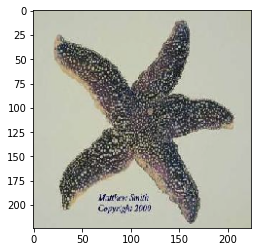

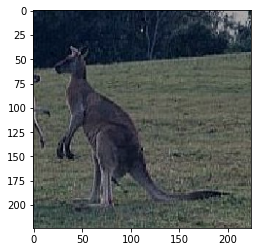

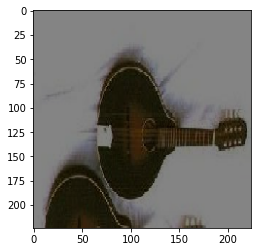

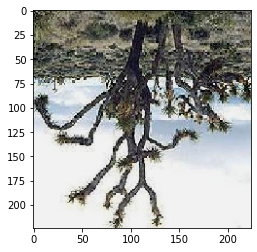

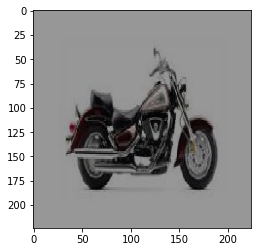

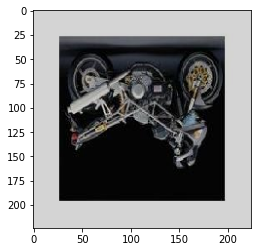

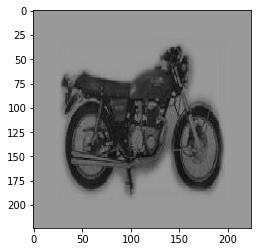

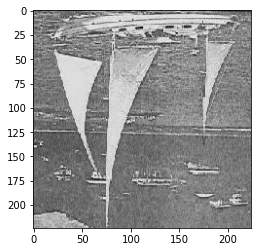

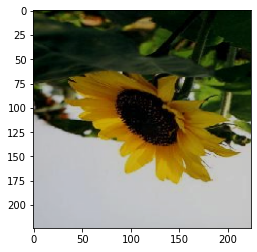

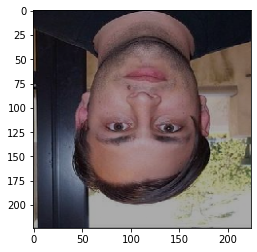

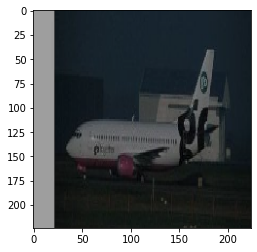

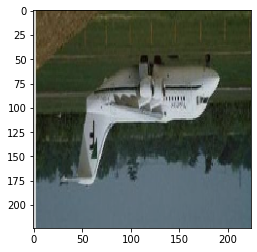

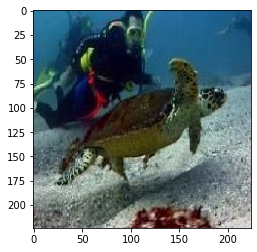

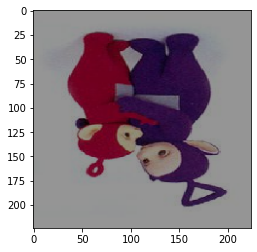

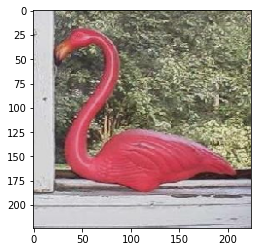

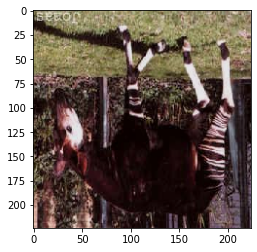

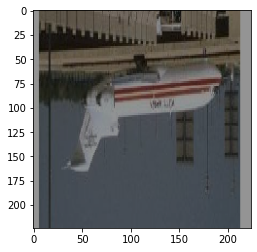

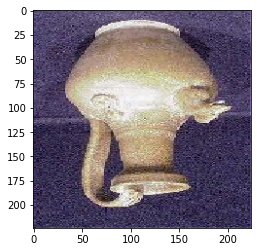

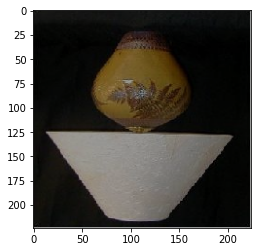

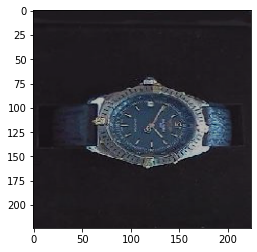

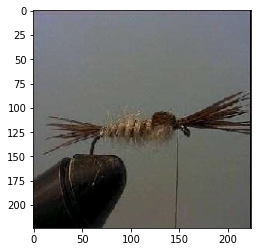

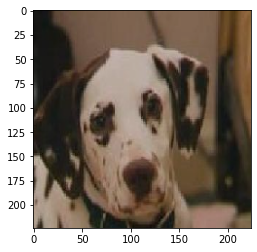

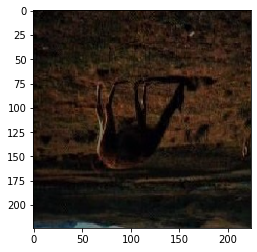

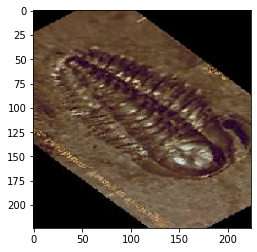

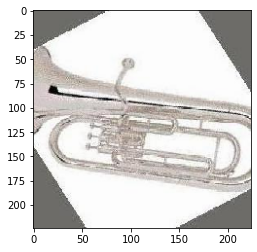

In [261]:
imgs, labels = next(iter(train_img))
for img, label in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

In [262]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224,224,3),
                                              include_top = False,
                                              weights='imagenet')

In [263]:
base_model.trainable = False

In [264]:
model = Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation='softmax')
])

In [265]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 2048)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_103 (Dense)           (None, 102)               835686    
                                                                 
Total params: 22,638,470
Trainable params: 835,686
Non-trainable params: 21,802,784
_________________________________________________________________


In [278]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [279]:
h = model.fit(train_img, validation_data=val_img, epochs=1, steps_per_epoch=20)

20/20 [==============================] - 303s 15s/step - loss: 5.2531 - categorical_accuracy: 0.5063 - val_loss: 3.3797 - val_categorical_accuracy: 0.5852


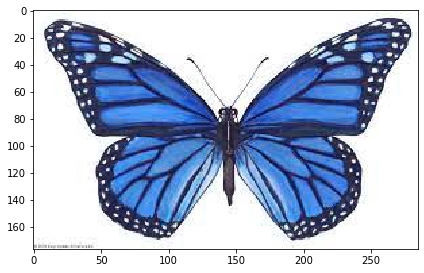

In [280]:
from skimage.io import imshow, imread
import cv2

im = cv2.imread('butterfly.png')
imshow(im)



In [281]:
im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (224, 224)).astype(np.float32) / 255.0
im = np.expand_dims(im, axis =0)

labels = (train_img.class_indices)
labels = dict((v,k) for k,v in labels.items())   

In [282]:
pred = labels[np.argmax(model.predict(im))]

In [283]:
pred

'butterfly'